In [1]:
import tensorflow as tp
import numpy as np 
import pandas as pd 
import pandas_datareader as data 
import matplotlib.pyplot as plt
import pickle

In [7]:
start = '2010-01-01'
end = '2019-12-31'
df = data.DataReader('SBIN.NS', 'yahoo', start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,230.000000,227.500000,227.500000,229.119995,11031470.0,199.520020
2010-01-05,231.000000,228.009995,230.800003,229.205002,11613740.0,199.594070
2010-01-06,231.500000,228.500000,229.699997,230.580002,14527930.0,200.791458
2010-01-07,231.000000,228.110001,230.600006,229.289993,8576510.0,199.668045
2010-01-08,230.389999,228.009995,229.399994,228.604996,10453820.0,199.071579


In [8]:
df = df.reset_index()

In [9]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,230.000000,227.500000,227.500000,229.119995,11031470.0,199.520020
1,2010-01-05,231.000000,228.009995,230.800003,229.205002,11613740.0,199.594070
2,2010-01-06,231.500000,228.500000,229.699997,230.580002,14527930.0,200.791458
3,2010-01-07,231.000000,228.110001,230.600006,229.289993,8576510.0,199.668045
4,2010-01-08,230.389999,228.009995,229.399994,228.604996,10453820.0,199.071579


In [10]:
df = df.drop(['Adj Close', 'Date'], axis=1)

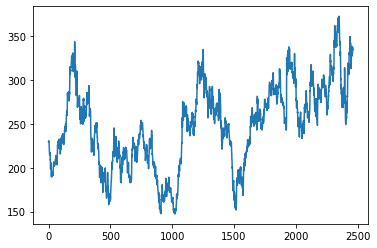

In [11]:
plt.plot(df.Close)

In [12]:
weekma = df.Close.rolling(100).mean()

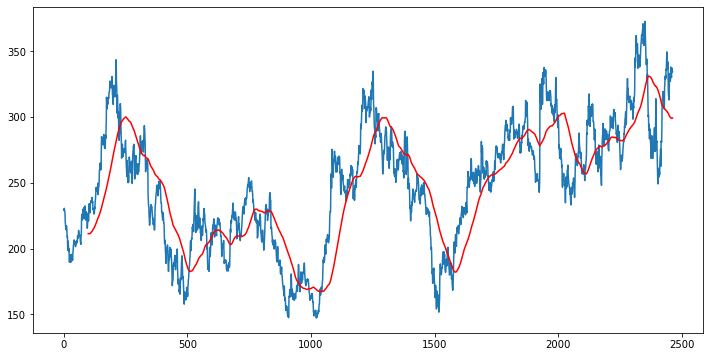

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(weekma, "r")

In [14]:
weekma2 = df.Close.rolling(200).mean()

In [15]:
df.shape

(2463, 5)

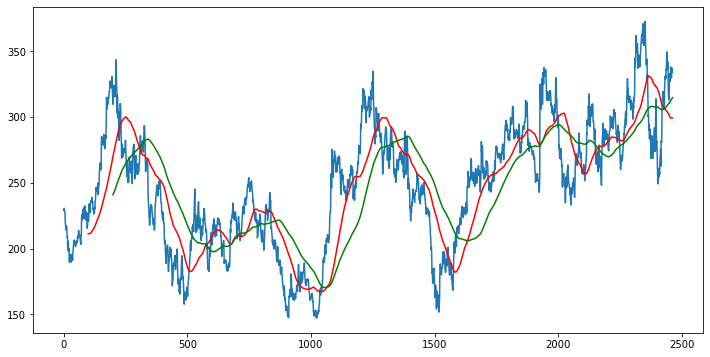

In [16]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(weekma, "r")
plt.plot(weekma2, "g")


In [17]:
#Splitting into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing =  pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1724, 1)
(739, 1)


In [18]:
data_training.head()

,Close
0,229.119995
1,229.205002
2,230.580002
3,229.289993
4,228.604996


In [19]:
data_testing.tail()

,Close
2458,329.850006
2459,337.250000
2460,334.399994
2461,333.750000
2462,334.450012


In [20]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.41717475],
       [0.4176085 ],
       [0.42462434],
       ...,
       [0.51733551],
       [0.51223307],
       [0.5117228 ]])

In [21]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])

In [22]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [23]:
x_train.shape

(1624, 100, 1)

In [24]:
y_train.shape

(1624,)

In [25]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

Using TensorFlow backend.


In [26]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1))) 
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True)) 
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True)) 
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu')) 
model.add(Dropout(0.5))

model.add(Dense(units = 1))

2022-06-04 10:51:49.212450: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-04 10:51:49.214764: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_7 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 120)              

In [27]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [43]:
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1624/1624 [==============================] - 58s 35ms/step - loss: 0.0525
Epoch 2/10
1624/1624 [==============================] - 64s 40ms/step - loss: 0.0170
Epoch 3/10
1624/1624 [==============================] - 66s 41ms/step - loss: 0.0123
Epoch 4/10
1624/1624 [==============================] - 91s 56ms/step - loss: 0.0102
Epoch 5/10
1624/1624 [==============================] - 136s 84ms/step - loss: 0.0097
Epoch 6/10
1624/1624 [==============================] - 148s 91ms/step - loss: 0.0087
Epoch 7/10
1624/1624 [==============================] - 156s 96ms/step - loss: 0.0089
Epoch 8/10
1624/1624 [==============================] - 139s 86ms/step - loss: 0.0083
Epoch 9/10
1624/1624 [==============================] - 73s 45ms/step - loss: 0.0081
Epoch 10/10
1624/1624 [==============================] - 175s 108ms/step - loss: 0.0071


In [ ]:
# # serialize model to JSON
# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# model.save_weights("model.h5")
# print("Saved model to disk")

In [ ]:
# model.save('keras_model.h5')

In [47]:
data_testing.head()

,Close
1724,250.199997
1725,243.600006
1726,244.899994
1727,242.899994
1728,245.350006


In [48]:
past_100_days = data_training.tail(100)

In [49]:
final_df = past_100_days.append(data_testing, ignore_index = True)
final_df.head()

,Close
0,226.649994
1,225.649994
2,232.750000
3,233.250000
4,235.149994


In [50]:
inputs = scaler.transform(final_df)
inputs

array([[0.40457174],
       [0.39946931],
       [0.4356966 ],
       [0.43824782],
       [0.44794241],
       [0.42931857],
       [0.40712296],
       [0.48952727],
       [0.50713064],
       [0.50457943],
       [0.51554962],
       [0.56708421],
       [0.54820523],
       [0.54795009],
       [0.54616421],
       [0.52447888],
       [0.50636531],
       [0.51886625],
       [0.53519402],
       [0.53646962],
       [0.53391841],
       [0.54718476],
       [0.57524813],
       [0.60943433],
       [0.61734319],
       [0.59565786],
       [0.53774523],
       [0.56223684],
       [0.55432813],
       [0.54565401],
       [0.55254225],
       [0.54641935],
       [0.52958131],
       [0.56402272],
       [0.54692962],
       [0.53213253],
       [0.51861111],
       [0.54284766],
       [0.50968186],
       [0.53009158],
       [0.55075645],
       [0.57346225],
       [0.57907496],
       [0.55841002],
       [0.56810476],
       [0.55738962],
       [0.52192766],
       [0.534

In [51]:
inputs.shape

(839, 1)

In [52]:
x_test = [] 
y_test = []

for i in range(100, (inputs.shape[0])):
    x_test.append(inputs[i-100: i])
    y_test.append(inputs[i,0])

In [53]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(739, 100, 1)
(739,)


In [54]:
y_predicted = (model.predict(x_test)) 

In [55]:
y_predicted.shape

(739, 1)

In [56]:
scaler.scale_

array([0.00510243])

In [57]:
scale = 1/0.0378916
scale 

26.391073483305007

In [58]:
y_predicted = scale * y_predicted
y_test = scale * y_test

In [64]:
y_test.shape
y_test


array([13.84829396, 12.95954818, 13.13460276, 12.86528548, 13.19520079,
       13.2692614 , 13.42412007, 13.59244337, 14.1108779 , 13.98968594,
       13.9425546 , 14.59564982, 14.62931448, 14.9457631 , 14.95249439,
       13.96275463, 14.38019517, 14.48118915, 15.06022377, 16.0364989 ,
       15.6998523 , 15.21508038, 16.60879812, 16.95890729, 17.53120651,
       17.46387719, 17.57833786, 17.48407927, 17.30228929, 17.36961861,
       16.73672136, 16.5414688 , 16.3731455 , 16.58186475, 16.42700813,
       16.46740408, 16.60879812, 16.82424865, 16.57513346, 16.27888281,
       16.40681016, 16.75018805, 16.15095546, 15.84797352, 16.49433745,
       16.21828478, 16.50106874, 16.95217601, 16.79058399, 17.14069728,
       17.50427725, 17.76685913, 17.07336796, 17.0397033 , 16.83098405,
       16.17788883, 16.31254747, 17.38981658, 17.78706121, 18.14390578,
       18.99898896, 19.34909814, 19.66554676, 19.6318821 , 20.19745003,
       19.59148616, 19.1336476 , 19.12018092, 19.81367209, 19.22

In [66]:
y_predicted.shape
y_predicted

array([[13.668239 ],
       [13.335143 ],
       [13.054912 ],
       [12.831004 ],
       [12.655873 ],
       [12.527596 ],
       [12.445756 ],
       [12.410991 ],
       [12.423778 ],
       [12.490282 ],
       [12.606346 ],
       [12.759223 ],
       [12.941959 ],
       [13.1472   ],
       [13.369656 ],
       [13.601783 ],
       [13.819967 ],
       [14.006662 ],
       [14.148858 ],
       [14.25224  ],
       [14.347074 ],
       [14.4494705],
       [14.55807  ],
       [14.684797 ],
       [14.840928 ],
       [15.0358515],
       [15.268278 ],
       [15.529265 ],
       [15.805883 ],
       [16.082304 ],
       [16.341707 ],
       [16.563004 ],
       [16.726425 ],
       [16.81646  ],
       [16.825123 ],
       [16.75958  ],
       [16.63885  ],
       [16.489288 ],
       [16.340431 ],
       [16.209719 ],
       [16.100561 ],
       [16.014175 ],
       [15.956319 ],
       [15.91827  ],
       [15.885026 ],
       [15.856799 ],
       [15.832098 ],
       [15.81

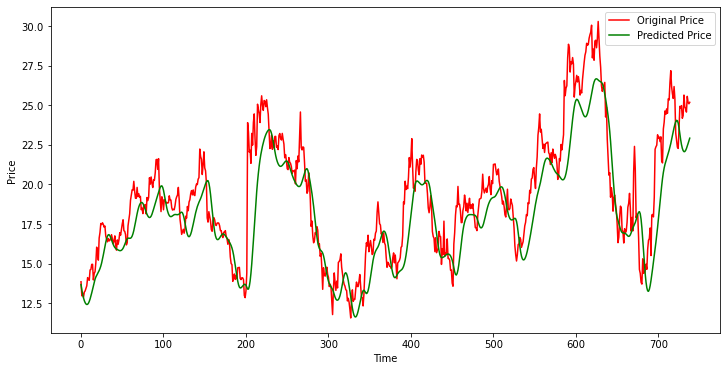

In [61]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'r', label = 'Original Price')
plt.plot(y_predicted, 'g', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()